<a href="https://colab.research.google.com/github/ra1croft/Acko_Insurance_Analysis/blob/main/NL_Uber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maximizing Revenue per Driver Hour (RDH) through Demand Optimization**

## **Objective**
The primary goal of this analysis is to:

- **Assess** demand trends across Bangalore.
- **Analyze** driver earnings per trip per hour with a focus on RDH.
- **Identify** key factors influencing RDH.
- **Provide** actionable insights that Uber can use to improve RDH.
- **Explore** trends and unexpected insights that can further benefit Uber’s operational efficiency.



## **Dataset Information**

### **Dataset:** Uber
- **Count of Rows:** 6,500,000
- **Count of Columns:** *16*

## **Dataset Description**

The dataset contains trip details including ride times, locations, fare components, driver activity, and customer behavior. It includes 16 columns:

- **VendorID**: Identifier for the taxi service provider.
- **tpep_pickup_datetime**: The date and time when the Uber trip started.
- **tpep_dropoff_datetime**: The date and time when the Uber trip ended.
- **passenger_count**: Total number of passengers in the trip.
- **trip_distance**: Distance of the trip measured in kilometers.
- **PULocationID**: Unique location ID where the passenger was picked up.
- **DOLocationID**: Unique location ID where the passenger was dropped off.
- **payment_type**: Method of payment used for the trip.
- **fare_amount**: Base fare for the trip, excluding additional charges.
- **extra**: Additional charges such as late-night surcharges or peak-hour fees.
- **gst**: Goods and Services Tax (GST) applied to the trip.
- **tip_amount**: Tip given to the driver.
- **tolls_amount**: Charges for tolls during the trip.
- **improvement_surcharge**: Fixed surcharge used for Uber service improvements.
- **total_amount**: Total fare amount including base fare, extras, tolls, and taxes.
- **congestion_surcharge**: Additional charge applied for trips in congested areas.



## **Uber Dataset Importing**

In [ ]:
# Step 1: Install gdown
!pip install gdown

# Step 2: Import necessary libraries
import gdown
import pandas as pd

# Step 3: Set the file ID and create a download URL
file_id = "1zeewyef5Czg1B5PEAeFkvihPaqDtzmdG"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Step 4: Set the output file name
output_file = "uber_dataset.csv"

# Step 5: Download the file
gdown.download(download_url, output_file, quiet=False)

# Step 6: Load the CSV file into a Pandas DataFrame
data = pd.read_csv(output_file)


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\rajan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Downloading...
From (original): https://drive.google.com/uc?id=1zeewyef5Czg1B5PEAeFkvihPaqDtzmdG
From (redirected): https://drive.google.com/uc?id=1zeewyef5Czg1B5PEAeFkvihPaqDtzmdG&confirm=t&uuid=7f6d1b08-8e67-42a8-bda9-963527a7f767
To: c:\Users\rajan\OneDrive\Python\Final_Project_NextLeap\uber_dataset.csv
100%|██████████| 754M/754M [01:10<00:00, 10.7MB/s] 


In [ ]:
data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,gst,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.9,238,239,1.0,283.73,141.87,23.64,69.52,0.0,14.18,532.93,118.22
1,1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.9,239,238,1.0,331.01,141.87,23.64,70.93,0.0,14.18,581.63,118.22
2,1,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,1.0,238,238,1.0,283.73,141.87,23.64,47.29,0.0,14.18,510.71,118.22
3,1,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,1.3,238,151,1.0,260.08,23.64,23.64,64.31,0.0,14.18,385.87,0.00
4,1,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,193,193,2.0,165.51,23.64,23.64,0.00,0.0,14.18,226.98,0.00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500000 entries, 0 to 6499999
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           float64
 8   fare_amount            float64
 9   extra                  float64
 10  gst                    float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
 15  congestion_surcharge   float64
dtypes: float64(11), int64(3), object(2)
memory usage: 793.5+ MB


## **Importing Uber Location Mapping Dataset**

In [ ]:
file_id = "1V4dmzVKELh5P2zRXTjbeRrzsJO4aKW4G"
url = f"https://drive.google.com/uc?id={file_id}"
output = "uber_location.csv"  # Match actual file name

gdown.download(url, output, quiet=False)

data1 = pd.read_csv(output)
data1.info()

Downloading...
From: https://drive.google.com/uc?id=1V4dmzVKELh5P2zRXTjbeRrzsJO4aKW4G
To: c:\Users\rajan\OneDrive\Python\Final_Project_NextLeap\uber_location.csv
100%|██████████| 5.26k/5.26k [00:00<?, ?B/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Bangalore_Location  237 non-null    object
 1   LocationID          237 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


## **Mapping Both the Base Data and Loaction Data**
### **Steps to Process the Data**
- Merge data and data1 on PULocationID and DOLocationID.
- Replace numeric payment_type values with meaningful labels.
- Handle missing values in location mapping (Unknown Location).
- Save the cleaned dataset for further processing.

In [ ]:
# Load the datasets
data = pd.read_csv(output_file)  # Main Uber data
data1 = pd.read_csv(output)      # Location mapping data

# Convert LocationID in data1 to dictionary for mapping
location_dict = data1.set_index("LocationID")["Bangalore_Location"].to_dict()

# Replace PULocationID & DOLocationID with actual location names
data["PULocation"] = data["PULocationID"].map(location_dict).fillna("Unknown Location")
data["DOLocation"] = data["DOLocationID"].map(location_dict).fillna("Unknown Location")

# Drop the old columns
data.drop(columns=["PULocationID", "DOLocationID"], inplace=True)

# Define payment type mapping
payment_mapping = {
    1.0: "UPI",
    2.0: "Cash",
    3.0: "Credit/Debit Card",
    4.0: "Uber Money",
    5.0: "Voided Trip",
    6.0: "Dispute"
}

# Replace payment_type with actual names
data["payment_type"] = data["payment_type"].map(payment_mapping).fillna("Unknown")

# Save the processed file
data.to_csv("cleaned_data.csv", index=False)

print("Data processing complete. Cleaned file saved as 'cleaned_data.csv'.")


Data processing complete. Cleaned file saved as 'cleaned_data.csv'.


## **Final Combined and mapped data**

In [ ]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,payment_type,fare_amount,extra,gst,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,PULocation,DOLocation
0,1,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.9,UPI,283.73,141.87,23.64,69.52,0.0,14.18,532.93,118.22,Bagmane Tech Park (CV Raman Nagar),Unknown Location
1,1,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.9,UPI,331.01,141.87,23.64,70.93,0.0,14.18,581.63,118.22,Unknown Location,Bagmane Tech Park (CV Raman Nagar)
2,1,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,1.0,UPI,283.73,141.87,23.64,47.29,0.0,14.18,510.71,118.22,Bagmane Tech Park (CV Raman Nagar),Bagmane Tech Park (CV Raman Nagar)
3,1,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,1.3,UPI,260.08,23.64,23.64,64.31,0.0,14.18,385.87,0.00,Bagmane Tech Park (CV Raman Nagar),Basaveshwaranagar
4,1,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,Cash,165.51,23.64,23.64,0.00,0.0,14.18,226.98,0.00,Banaswadi,Banaswadi


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500000 entries, 0 to 6499999
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   payment_type           object 
 6   fare_amount            float64
 7   extra                  float64
 8   gst                    float64
 9   tip_amount             float64
 10  tolls_amount           float64
 11  improvement_surcharge  float64
 12  total_amount           float64
 13  congestion_surcharge   float64
 14  PULocation             object 
 15  DOLocation             object 
dtypes: float64(10), int64(1), object(5)
memory usage: 793.5+ MB


## **Data Cleaning**
**Step 1: Initial Inspection of Data**
##### **We'll check:**
- Column names and data types
- Missing values
- Duplicate records
- Basic summary statistics

In [ ]:
# Load the dataset (assuming it's already in a DataFrame called 'data')
print("Dataset Overview:")
print(data.info())  # Check column data types and missing values

print("\nFirst 5 Rows:")
print(data.head())  # Display first few rows

print("\nSummary Statistics:")
print(data.describe())  # Get basic statistics for numerical columns

print("\nChecking for Duplicates:")
print(f"Total duplicate rows: {data.duplicated().sum()}")  # Count duplicate rows

print("\nChecking for Missing Values:")
print(data.isnull().sum())  # Count missing values per column


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500000 entries, 0 to 6499999
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   payment_type           object 
 6   fare_amount            float64
 7   extra                  float64
 8   gst                    float64
 9   tip_amount             float64
 10  tolls_amount           float64
 11  improvement_surcharge  float64
 12  total_amount           float64
 13  congestion_surcharge   float64
 14  PULocation             object 
 15  DOLocation             object 
dtypes: float64(10), int64(1), object(5)
memory usage: 793.5+ MB
None

First 5 Rows:
   VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  passenger_count  \
0         1  01/01/2020 12:28:15 AM  01/01/2020 12:33:03

### **Observation**
- Total duplicate rows: 12949
- Pickup and drop off date time is in object format
- 79229 missing data in passanger count columns
- negative values in key numerical columns such as trip distance, fare amount, etc.
- Outliers

#### **1. Removing Duplicate Rows**

In [ ]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)
print(f"Total duplicate rows after removal: {data.duplicated().sum()}")

Total duplicate rows after removal: 0


#### **2. Converting Date Columns to Datetime Format**

In [ ]:
# Convert datetime columns to correct format
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], errors='coerce')

# Check if conversion was successful
print(data[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].info())

C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\933492513.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')
C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\933492513.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 6487051 entries, 0 to 6499999
Data columns (total 2 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 148.5 MB
None


#### **3. Handling Missing Values in passenger_count**

In [ ]:
# Fill missing values in passenger_count with the mode (most common value)
data['passenger_count'].fillna(data['passenger_count'].mode()[0], inplace=True)

# Check if there are still missing values
print(f"Missing values in passenger_count after imputation: {data['passenger_count'].isnull().sum()}")

Missing values in passenger_count after imputation: 0


C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\1902512867.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['passenger_count'].fillna(data['passenger_count'].mode()[0], inplace=True)


#### **4. Handling Negative Values in Key Numeric Columns**

In [ ]:
# Replace negative values with NaN in key financial columns
cols_to_fix = ['trip_distance', 'fare_amount', 'gst', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge']
for col in cols_to_fix:
    data[col] = data[col].apply(lambda x: x if x >= 0 else None)

# Drop rows where these key metrics are NaN (since negative values are invalid)
data.dropna(subset=cols_to_fix, inplace=True)

# Confirm no negative values remain
print((data[cols_to_fix] < 0).sum())


trip_distance           0
fare_amount             0
gst                     0
tip_amount              0
tolls_amount            0
total_amount            0
congestion_surcharge    0
dtype: int64


#### **5. Handling Outliers (Using IQR)**

In [ ]:
# Define function to remove extreme outliers using IQR method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.10)
    Q3 = df[col].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Apply outlier removal to key numeric columns
for col in cols_to_fix:
    data = remove_outliers(data, col)

# Confirm data size after outlier removal
print(f"Data size after outlier removal: {data.shape}")


Data size after outlier removal: (5597987, 16)


In [ ]:
data.describe().round(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,gst,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,5597987.0,5597987,5597987,5597987.00,5597987.00,5597987.00,5597987.00,5597987.00,5597987.00,5597987.0,5597987.00,5597987.00,5597987.00
mean,1.0,2020-01-17 12:01:22.136637696,2020-01-17 12:15:32.112060160,1.52,3.22,469.06,54.65,23.64,87.88,0.0,14.18,728.53,118.22
min,1.0,2008-12-31 23:03:44,2008-12-31 23:32:32,0.00,0.00,0.00,0.00,23.64,0.00,0.0,0.00,156.05,118.22
25%,1.0,2020-01-09 20:35:52.500000,2020-01-09 20:49:21.500000,1.00,1.50,283.73,0.00,23.64,0.00,0.0,14.18,527.73,118.22
50%,1.0,2020-01-17 10:18:17,2020-01-17 10:33:46,1.00,2.40,401.95,23.64,23.64,92.21,0.0,14.18,652.57,118.22
75%,1.0,2020-01-25 00:24:47.500000,2020-01-25 00:38:40.500000,2.00,4.00,567.45,118.22,23.64,130.04,0.0,14.18,841.72,118.22
max,1.0,2021-01-02 01:12:10,2021-01-02 01:25:01,8.00,25.20,2063.65,867.73,23.64,472.41,0.0,14.18,2219.69,118.22
std,0.0,NaN,NaN,1.16,2.69,251.91,58.63,0.00,72.02,0.0,0.17,292.08,0.00


#### **Observation from the current dataset**
- zero values in key columns such as trip distance, fare amount, etc

#### **1. Handling Zero Values in Key Columns**
- Since values like trip_distance = 0, fare_amount = 0, or passenger_count = 0 are not realistic, so let's remove them.

In [ ]:
# Removing rows where trip_distance, fare_amount, or passenger_count are zero
data = data[(data['trip_distance'] > 0) & (data['fare_amount'] > 0) & (data['passenger_count'] > 0)]

# Check how many rows are left after removing these invalid cases
print(f"Data size after removing zero values: {data.shape}")

Data size after removing zero values: (5484358, 16)


#### **2. Checking for Unrealistic Fare Amounts**
- Even after removing zeros, we should check if fare_amount is too low (e.g., less than ₹20 for a ride).

In [ ]:
# Removing rides with an unrealistically low fare amount
data = data[data['fare_amount'] >= 20]

# Check how many rows are left
print(f"Data size after removing low fare rides: {data.shape}")


Data size after removing low fare rides: (5484358, 16)


#### **3. Checking for Duration Mismatches**
- Now, let’s check if the ride duration is too short or too long.
Helps eliminate data entry errors or incorrect timestamps.

In [ ]:
# Calculate ride duration in minutes
data['ride_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60

# Removing rides with duration less than 1 min or greater than 180 min (3 hours)
data = data[(data['ride_duration'] >= 1) & (data['ride_duration'] <= 180)]

# Check how many rows are left
print(f"Data size after removing unrealistic durations: {data.shape}")

Data size after removing unrealistic durations: (5464987, 17)


In [ ]:
print(data.describe().round(2))

        VendorID           tpep_pickup_datetime  \
count  5464987.0                        5464987   
mean         1.0  2020-01-17 11:51:26.141021952   
min          1.0            2008-12-31 23:06:13   
25%          1.0            2020-01-09 20:33:54   
50%          1.0            2020-01-17 10:12:54   
75%          1.0            2020-01-25 00:22:42   
max          1.0            2021-01-02 01:12:10   
std          0.0                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        5464987       5464987.00     5464987.00   
mean   2020-01-17 12:02:54.984359168             1.55           3.24   
min              2008-12-31 23:32:32             1.00           0.10   
25%              2020-01-09 20:45:43             1.00           1.50   
50%              2020-01-17 10:26:16             1.00           2.40   
75%       2020-01-25 00:34:23.500000             2.00           4.00   
max              2021-01-02 01:25:01

## **Feature Engineering:**

#####Now the data is cleaned, so leat's move for feature engineering:
- **Step 1: Extracting Date & Time Features - Since time-based analysis is critical for ride demand, let's extract key features from timestamps.**
  - Extracting hour of the day
  - Extracting day of the month
  - Extracting week name, such as 0 for Monday & 1 for Tuesday and so on.
  - Extracting Month
  - Classifying weekday and weekend
  - Extracting trip duration in minutes
  - Defining peak hours


In [ ]:
# Extract date-time features
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour  # Hour of day
data['pickup_day'] = data['tpep_pickup_datetime'].dt.day    # Day of month
data['pickup_weekday'] = data['tpep_pickup_datetime'].dt.weekday  # 0=Monday, 6=Sunday
data['pickup_month'] = data['tpep_pickup_datetime'].dt.month  # Month
data['pickup_weekend'] = (data['pickup_weekday'] >= 5).astype(int)  # 1 if weekend, 0 if weekday

# Extract trip duration in minutes
data['ride_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60


In [ ]:
#Defining peak hours
peak_hours = list(range(6, 9)) + list(range(16, 19))  # 6-9 AM & 4-7 PM
data['is_peak'] = data['pickup_hour'].apply(lambda x: 'Peak' if x in peak_hours else 'Non-Peak')

#### **Step 2: Creating Distance-Based Features**
- Bucketing the trip distance into short, medium, and long trips for better analysis.


In [ ]:
# Categorizing trip distances
data['trip_distance_category'] = pd.cut(
    data['trip_distance'],
    bins=[0, 2, 5, 10, 100],
    labels=['Short', 'Medium', 'Long', 'Very Long']
)


#### **Step 3: Generating Revenue Per Driver Hour (RDH) Feature**
- Since our goal is to maximize RDH, let’s compute this per ride.

In [ ]:
# Revenue per driver hour (RDH)
data['revenue_per_hour'] = data['total_amount'] / (data['ride_duration'] / 60)

#### **Step 4: Identifying High-Demand Pickup and Dropoff Locations**
- Grouping trips by Pickup and Dropoff locations will help identify hotspots.
- It helps in fleet allocation & optimizing demand-based pricing.

In [ ]:
# Count rides per pickup & dropoff location
pickup_counts = data['PULocation'].value_counts().reset_index()
pickup_counts.columns = ['PULocation', 'pickup_count']

dropoff_counts = data['DOLocation'].value_counts().reset_index()
dropoff_counts.columns = ['DOLocation', 'dropoff_count']

# Merge back into the dataset
data = data.merge(pickup_counts, on='PULocation', how='left')
data = data.merge(dropoff_counts, on='DOLocation', how='left')

#### **Step 5: Creating a Demand-Supply Ratio Feature**
This feature will help identify areas where demand is higher than supply.

In [ ]:
# Estimating demand-supply ratio
data['demand_supply_ratio'] = data['pickup_count'] / (data['dropoff_count'] + 1)  # +1 to avoid division by zero

## **Exploratory Data Analysis (EDA)**

### **1. Univariate Analysis to explore individual features.**

- **A. Distribution of Numerical Variables**

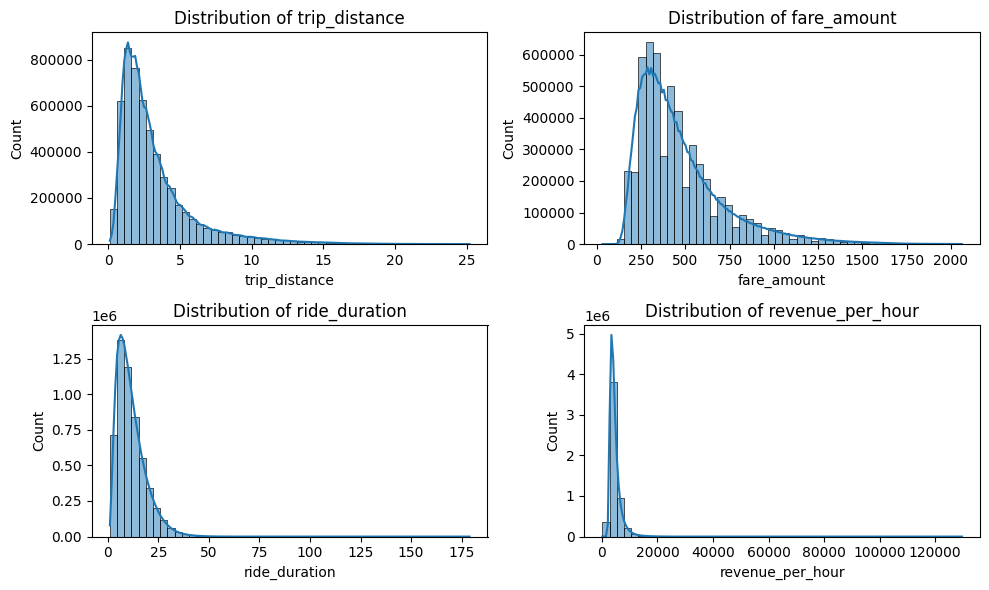

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns for analysis
num_cols = ['trip_distance', 'fare_amount', 'ride_duration', 'revenue_per_hour']

# Plot histograms for numerical variables
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


🔍 **Observations**
- Shorter trips dominate Uber rides in Bangalore.
- Revenue per hour varies significantly, suggesting fluctuating demand across different hours


#### **Checking all the columns once again**

In [ ]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

print(data.head(5))

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2020-01-01 00:28:15   2020-01-01 00:33:03              1.0   
1         1  2020-01-01 00:35:39   2020-01-01 00:43:04              1.0   
2         1  2020-01-01 00:47:41   2020-01-01 00:53:52              1.0   
3         1  2020-01-01 00:29:01   2020-01-01 00:40:28              2.0   
4         1  2020-01-01 00:55:11   2020-01-01 01:12:03              2.0   

   trip_distance payment_type  fare_amount   extra    gst  tip_amount  \
0            1.9          UPI       283.73  141.87  23.64       69.52   
1            1.9          UPI       331.01  141.87  23.64       70.93   
2            1.0          UPI       283.73  141.87  23.64       47.29   
3            1.1          UPI       378.31  141.87  23.64      111.12   
4            3.8          UPI       567.45  141.87  23.64       82.75   

   tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  \
0           0.0                 

- **B. Distribution of Categorical Variables**

C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\481748906.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], order=data[col].value_counts().index, palette='viridis')
C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\481748906.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], order=data[col].value_counts().index, palette='viridis')
C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\481748906.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], order=data[col].value_counts().index, palette='viridis'

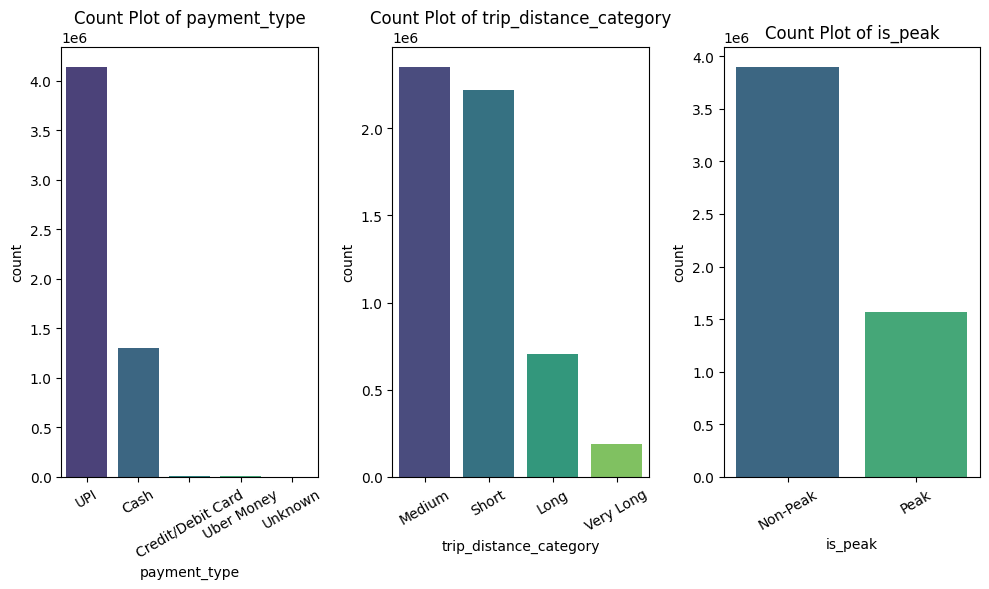

In [ ]:
# Selecting categorical columns
cat_cols = ['payment_type', 'trip_distance_category', 'is_peak']

# Plot count plots for categorical variables
plt.figure(figsize=(10, 6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=data[col], order=data[col].value_counts().index, palette='viridis')
    plt.xticks(rotation=30)
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

#### **🔍 Observations**
- UPI is the most preferred payment method
- Short and medium trips dominate ride distances
- Non-peak rides significantly outnumber peak-hour rides


### **2. Bivariate Analysis**

#### **Key Bivariate Analyses for Revenue Optimization**

#### Revenue (Revenue per hr is RDH only) Correlations to Explore:

- **Revenue vs. Trip Distance**
  - Does a longer trip distance correlate with higher revenue per hour?

- **Revenue vs.  Ride Duration bold text**
  - How does trip duration impact revenue efficiency?

- **Revenue vs.  Peak/Non-Peak**
  - Do peak hours generate higher revenue?

- **Revenue vs. Payment Type**
  - Are certain payment methods linked to higher revenues?

- **Revenue vs. Demand-Supply Metrics**
  - How does demand-supply imbalance affect revenue?

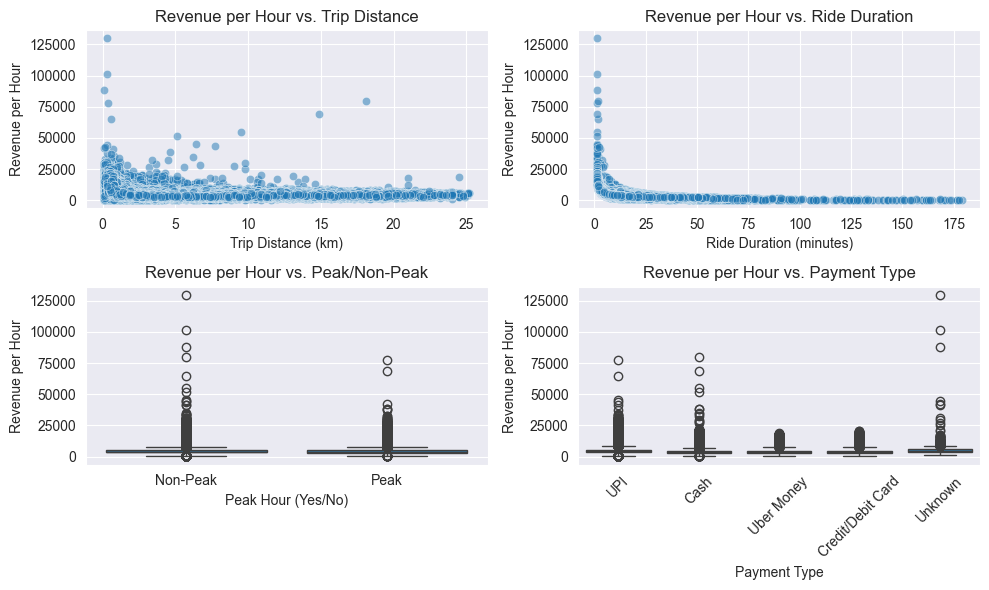

In [ ]:
# Set plot style
sns.set_style("darkgrid")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Scatter Plot: Revenue per hour vs. Trip Distance
sns.scatterplot(x=data['trip_distance'], y=data['revenue_per_hour'], alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title("Revenue per Hour vs. Trip Distance")
axes[0, 0].set_xlabel("Trip Distance (km)")
axes[0, 0].set_ylabel("Revenue per Hour")

# Scatter Plot: Revenue per hour vs. Ride Duration
sns.scatterplot(x=data['ride_duration'], y=data['revenue_per_hour'], alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title("Revenue per Hour vs. Ride Duration")
axes[0, 1].set_xlabel("Ride Duration (minutes)")
axes[0, 1].set_ylabel("Revenue per Hour")

# Box Plot: Revenue per hour across Peak/Non-Peak
sns.boxplot(x=data['is_peak'], y=data['revenue_per_hour'], ax=axes[1, 0])
axes[1, 0].set_title("Revenue per Hour vs. Peak/Non-Peak")
axes[1, 0].set_xlabel("Peak Hour (Yes/No)")
axes[1, 0].set_ylabel("Revenue per Hour")

# Box Plot: Revenue per hour across Payment Types
sns.boxplot(x=data['payment_type'], y=data['revenue_per_hour'], ax=axes[1, 1])
axes[1, 1].set_title("Revenue per Hour vs. Payment Type")
axes[1, 1].set_xlabel("Payment Type")
axes[1, 1].set_ylabel("Revenue per Hour")
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()


####  🔍**Observations from Bivariate Analysis**

#####  Revenue Per Hour Insights  

#####  **Revenue per Hour vs. Trip Distance**  
- Shorter trips generate higher revenue per hour.
- Longer trips tend to decrease revenue per hour.  
- Some outliers show high revenue for longer trips.  

#####  **Revenue per Hour vs. Ride Duration**  
- Shorter rides yield better revenue efficiency.  
- Longer rides tend to lower revenue per hour.  

#####  **Revenue per Hour vs. Peak/Non-Peak Hours**  
- Median revenue per hour remains fairly stable.  
- Peak hours have some high-revenue outliers.  
- Peak hours do not always guarantee higher revenue.  

#####  **Revenue per Hour vs. Payment Type**  
- UPI and Cash are the most frequently used payment methods.  
- All payment types have high-revenue outliers.  


###  **3. Revenue Hourly trend**
##### **Expected Insights:**
- Identify peak hours where revenue per hour is the highest.
- Determine if there are any dips in revenue at certain times.
- Understand how revenue behaves throughout the day.

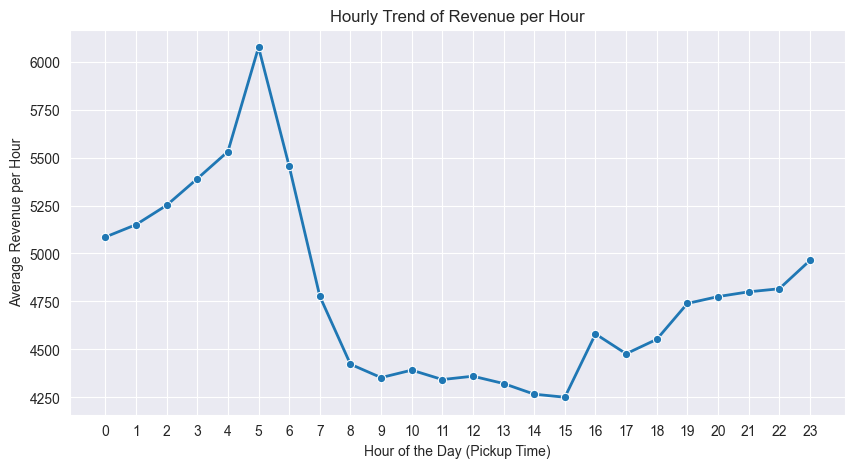

In [ ]:
# Grouping data by pickup_hour and calculating mean revenue per hour
hourly_revenue = data.groupby('pickup_hour')['revenue_per_hour'].mean()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_revenue.index, y=hourly_revenue.values, marker='o', linewidth=2)

# Labels and title
plt.xlabel("Hour of the Day (Pickup Time)")
plt.ylabel("Average Revenue per Hour")
plt.title("Hourly Trend of Revenue per Hour")
plt.xticks(range(0, 24))  # Ensuring all 24 hours are displayed
plt.grid(True)

plt.show()


#### 🔍**Observations from Hourly Revenue Trend**

#####  **Key Insights from the Line Plot**  
- **Peak Revenue Hours**:  
  - A sharp spike is observed around 5 AM - 6 AM.  
  - Likely due to high-demand rides (airport travelers, office commuters).  
- **Midday Dip**:  
  - Revenue drops significantly between 7 AM - 3 PM.  
  - Possibly due to lower ride demand during non-peak hours.  
- **Evening Recovery**:  
  - Gradual increase from 4 PM - 11 PM, aligning with evening commute hours.  


### **4. Hourly Revenue Trend: Weekdays vs. Weekends**

#####  **Key Insights from the Comparison Line Plot**  
- **Weekday vs. Weekend Revenue Variations**:  
  - Helps understand how revenue per hour changes across the day.  
  - Identifies if weekday and weekend demand patterns differ.  
- **Peak Demand Shifts**:  
  - Do peak revenue hours differ between weekdays and weekends?  
  - Are morning/evening peaks more prominent on certain days?  
- **Significant Revenue Differences**:  
  - Are there specific hours with major revenue differences?  
  - Does the weekend show overall higher/lower revenue?  


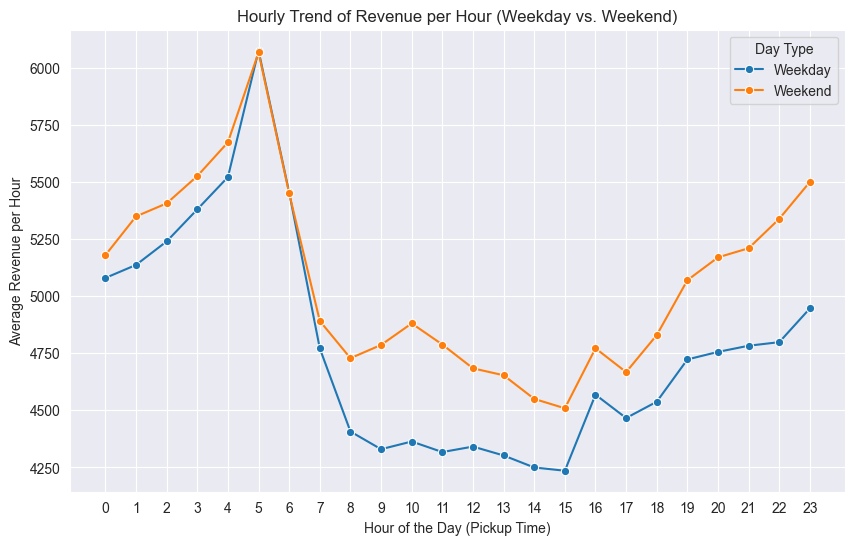

In [ ]:
# Create a new column to distinguish Weekday vs. Weekend
data['day_type'] = data['pickup_day'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')

# Group by hour and day type, then calculate the average revenue per hour
hourly_revenue = data.groupby(['pickup_hour', 'day_type'])['revenue_per_hour'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_revenue, x='pickup_hour', y='revenue_per_hour', hue='day_type', marker='o')

# Formatting
plt.title("Hourly Trend of Revenue per Hour (Weekday vs. Weekend)")
plt.xlabel("Hour of the Day (Pickup Time)")
plt.ylabel("Average Revenue per Hour")
plt.xticks(range(0, 24))
plt.legend(title="Day Type")
plt.grid(True)
plt.show()


### 🔍 **Observations: Hourly Revenue Trend (Weekdays vs. Weekends)**

#####  **Higher Late-Night Revenue on Weekends**  
- Revenue per hour is higher from 12 AM - 6 AM on weekends.  
- Likely driven by late-night rides, including parties, nightlife, and travel.  
##### **Lower Mid-Day Revenue on Weekdays**  
- On weekdays, revenue drops significantly after 7 AM and stays low until 3 PM.  
- Likely due to lower ride demand during office hours.  
- Weekends maintain slightly better mid-day revenue, possibly due to leisure activities.  
##### **Evening Surge on Weekends**  
- Steady revenue increase from 5 PM - 11 PM on weekends, possibly due to:  
  - Leisure travel  
  - Outings and social events  
  - Increased demand for ride services  
- Weekday evenings also show an increase, but at a slower rate compared to weekends.   


##  **5. Identifying Hotspot Locations for Fleet Optimization**
##### **Key Analyses to Perform**  

- **Top Pickup Locations by Ride Volume**  
  - Identify locations with the highest ride requests.  
  - Helps in allocating more drivers to high-demand areas.  
- **Top Pickup Locations by Revenue per Hour (RDH)**  
  - Find locations where RDH is the highest.  
  - Useful for optimizing pricing and fleet distribution.  
- **Heatmap of Ride Density Across Different Locations**  
  - Visualizes ride demand distribution across the city.  
  - Helps in identifying underutilized or high-demand areas.  

C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\1181448828.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rides, x='total_rides', y='PULocation', palette='Blues_r')


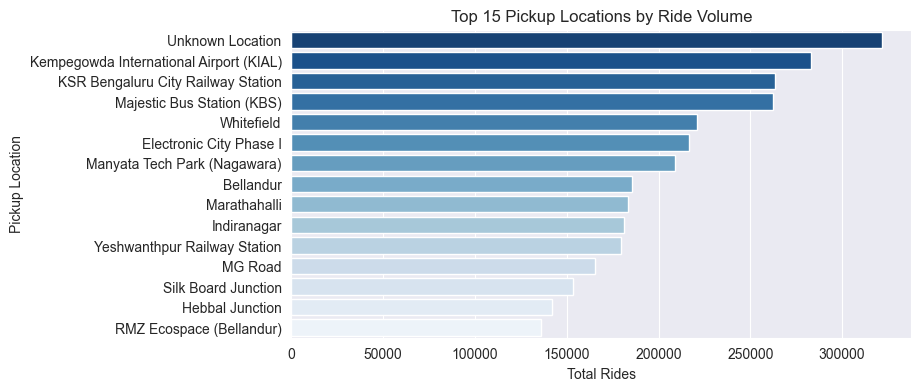

C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\1181448828.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_revenue, x='avg_revenue_per_hour', y='PULocation', palette='Reds_r')


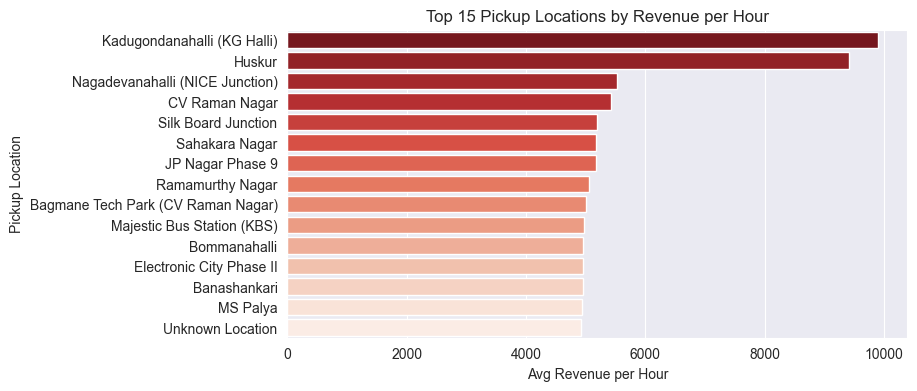

In [ ]:
# Group by pickup location and calculate total rides & average revenue per hour
location_analysis = data.groupby('PULocation').agg(
    total_rides=('PULocation', 'count'),
    avg_revenue_per_hour=('revenue_per_hour', 'mean')
).reset_index()

# Sort by total rides and avg revenue per hour
top_rides = location_analysis.sort_values(by='total_rides', ascending=False).head(15)
top_revenue = location_analysis.sort_values(by='avg_revenue_per_hour', ascending=False).head(15)

# Plot top pickup locations by total rides
plt.figure(figsize=(8, 4))
sns.barplot(data=top_rides, x='total_rides', y='PULocation', palette='Blues_r')
plt.xlabel("Total Rides")
plt.ylabel("Pickup Location")
plt.title("Top 15 Pickup Locations by Ride Volume")
plt.show()

# Plot top pickup locations by revenue per hour
plt.figure(figsize=(8, 4))
sns.barplot(data=top_revenue, x='avg_revenue_per_hour', y='PULocation', palette='Reds_r')
plt.xlabel("Avg Revenue per Hour")
plt.ylabel("Pickup Location")
plt.title("Top 15 Pickup Locations by Revenue per Hour")
plt.show()


### 🔍 **Observations: Hotspot Locations for Fleet Optimization**

#### **Top Pickup Locations by Ride Volume**
- High ride demand observed at:  
  - Kempegowda International Airport (KIAL)
  - KSR Bengaluru City Railway Station
  - Majestic Bus Station (KBS)
- **Actionable Insight**: More cabs should be deployed in these areas to meet demand.  
##### Top Pickup Locations by Revenue per Hour (RDH)
- Highest Revenue per Driver Hour (RDH) found in:  
  - Kadugondanahalli
  - Huskur  
  - Nagadevanahalli (NICE Junction)
- **Key Takeaway**: These are high-value areas, meaning trips from these places result in more earnings per hour.


### **6. Monthly Revenue Analysis**
- **Which Months Generate the Highest Revenue per Hour?**  
  - Analyze monthly RDH trends to find high-revenue periods.  
  - Useful for pricing strategy adjustments and driver incentives.  


C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\945289851.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_month', y='avg_revenue_per_hour', data=monthly_revenue, palette='Reds_r')


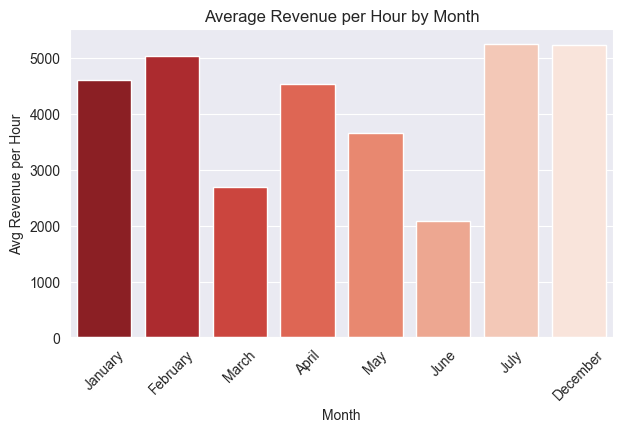

In [ ]:
monthly_revenue = data.groupby('pickup_month').agg(
    avg_revenue_per_hour=('revenue_per_hour', 'mean')
).reset_index()

# Sorting months correctly
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_revenue['pickup_month'] = monthly_revenue['pickup_month'].astype(int)
monthly_revenue = monthly_revenue.sort_values('pickup_month')
monthly_revenue['pickup_month'] = monthly_revenue['pickup_month'].map(lambda x: month_order[x - 1])

# Plot Revenue per Hour per Month
plt.figure(figsize=(7, 4))
sns.barplot(x='pickup_month', y='avg_revenue_per_hour', data=monthly_revenue, palette='Reds_r')
plt.xticks(rotation=45)
plt.title('Average Revenue per Hour by Month')
plt.xlabel('Month')
plt.ylabel('Avg Revenue per Hour')
plt.show()


### 🔍 **Observations on Monthly Revenue**
- Peak Revenue Months: February, January, and July show the highest average revenue per hour, indicating strong demand during these months.
- Low Revenue Period: June records the lowest revenue per hour, suggesting either reduced ride demand or operational inefficiencies.
- Gradual Increase in Late Months: Revenue rises significantly in December, possibly due to holiday season demand.

### **7. Revenue per Driver Hour (RDH) by Trip Distance Category**

C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\1387532568.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_revenue = data.groupby('distance_category').agg(
C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\1387532568.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_category', y='avg_revenue_per_hour', data=distance_revenue, palette='coolwarm')


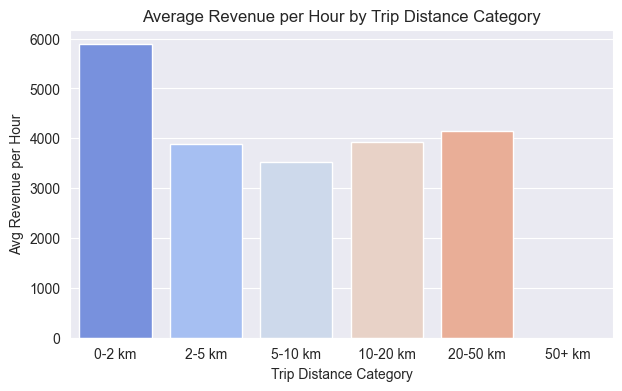

In [ ]:
# Define distance categories
bins = [0, 2, 5, 10, 20, 50, 100]  # Adjust bins based on your dataset
labels = ['0-2 km', '2-5 km', '5-10 km', '10-20 km', '20-50 km', '50+ km']
data['distance_category'] = pd.cut(data['trip_distance'], bins=bins, labels=labels, right=False)

# Group by distance category and calculate avg revenue per hour
distance_revenue = data.groupby('distance_category').agg(
    avg_revenue_per_hour=('revenue_per_hour', 'mean')
).reset_index()

# Plot RDH by Trip Distance Category
plt.figure(figsize=(7, 4))
sns.barplot(x='distance_category', y='avg_revenue_per_hour', data=distance_revenue, palette='coolwarm')
plt.title('Average Revenue per Hour by Trip Distance Category')
plt.xlabel('Trip Distance Category')
plt.ylabel('Avg Revenue per Hour')
plt.show()


###🔍 **Observations**
- 0-2 km trips generate the highest revenue per hour, indicating a strong demand for short-distance rides.
- 20-50 km trips also have high revenue per hour, suggesting profitability in longer rides.
- 2-5 km and 5-10 km trips have relatively lower revenue per hour compared to very short or long trips.
- 10-20 km trips show moderate revenue per hour, implying a balanced demand-supply scenario.


###  **8. Ride demand for each hour separately for weekdays and weekends**

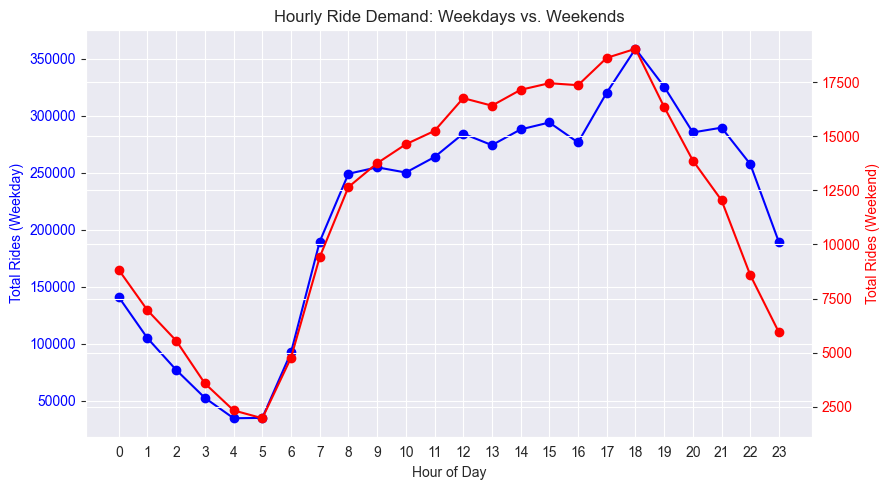

In [ ]:
# Aggregate ride counts per hour and day_type
hourly_demand = data.groupby(['pickup_hour', 'day_type']).size().reset_index(name='total_rides')

# Pivot data for easier plotting
hourly_demand_pivot = hourly_demand.pivot(index='pickup_hour', columns='day_type', values='total_rides').fillna(0)

# Plot with secondary y-axis for better comparison
fig, ax1 = plt.subplots(figsize=(9, 5))

# Primary y-axis (Weekday)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Total Rides (Weekday)', color='blue')
ax1.plot(hourly_demand_pivot.index, hourly_demand_pivot['Weekday'], marker='o', linestyle='-', color='blue', label='Weekday')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary y-axis (Weekend, scaled for visibility)
ax2 = ax1.twinx()
ax2.set_ylabel('Total Rides (Weekend)', color='red')
ax2.plot(hourly_demand_pivot.index, hourly_demand_pivot['Weekend'], marker='o', linestyle='-', color='red', label='Weekend')
ax2.tick_params(axis='y', labelcolor='red')

# Titles & Labels
plt.title('Hourly Ride Demand: Weekdays vs. Weekends')
ax1.set_xticks(range(0, 24))
fig.tight_layout()
plt.show()


## 🔍**Observations**
#### Weekday
- Demand is more high from 6-8 AM
- Then Demand is increasing from 4PM - 6PM
#### Weekend:
- Demand starting to rise from 6AM - 12 PM
- After 6 PM started declining

## **Hypothesis Testing for Revenue Optimization**

#####  **Key Visualizations for RDH Distribution**
######  **Essential Plots to Analyze Revenue per Driver Hour (RDH)**  
- **Histogram**  
  - Visualizes the frequency distribution of RDH values.  
  - Helps identify common RDH ranges and overall spread.  
- **Box Plot**  
  - Detects outliers and shows quartiles & median of RDH.  
  - Useful for spotting extremely high/low revenue hours.  
- **KDE (Kernel Density Estimate) Plot**
  - Smooths the histogram to show the underlying distribution shape.  
  - Helps understand whether RDH follows a normal or skewed distribution.  

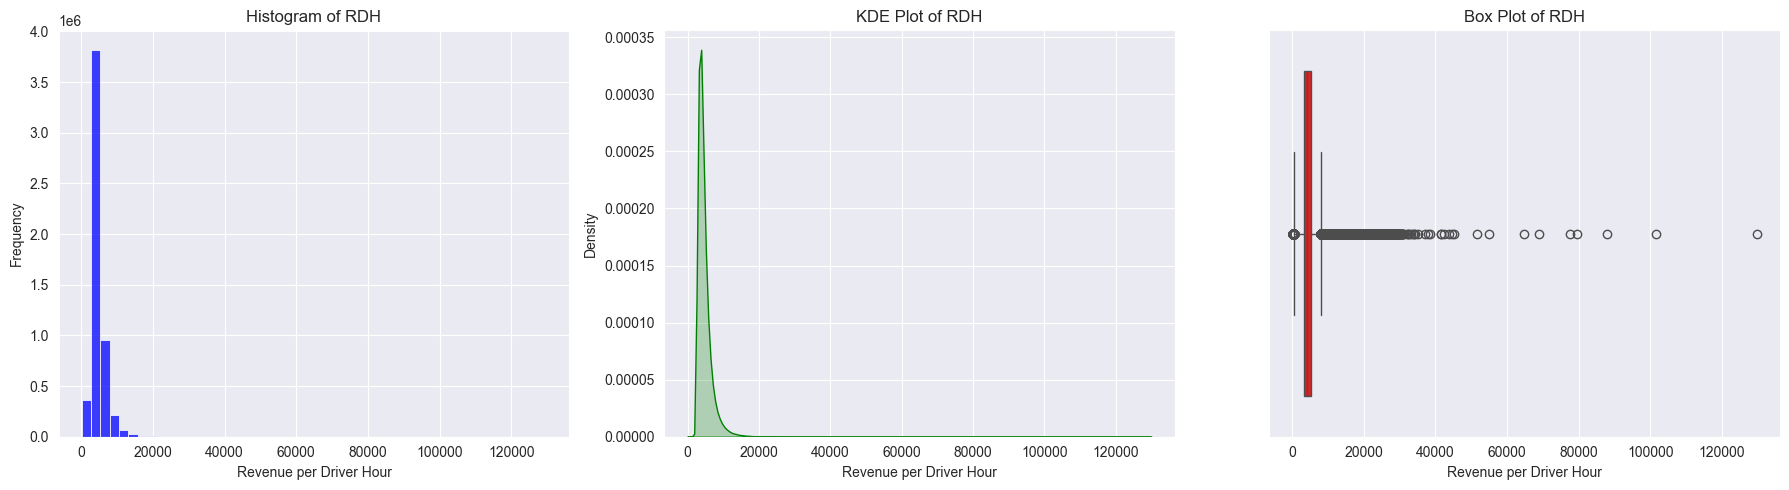

In [ ]:
# Set plot style
sns.set_style("darkgrid")

# Create a figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
sns.histplot(data['revenue_per_hour'], bins=50, kde=False, ax=axes[0], color='blue')
axes[0].set_title('Histogram of RDH')
axes[0].set_xlabel('Revenue per Driver Hour')
axes[0].set_ylabel('Frequency')

# KDE Plot
sns.kdeplot(data['revenue_per_hour'], fill=True, color='green', ax=axes[1])
axes[1].set_title('KDE Plot of RDH')
axes[1].set_xlabel('Revenue per Driver Hour')

# Box Plot
sns.boxplot(x=data['revenue_per_hour'], ax=axes[2], color='red')
axes[2].set_title('Box Plot of RDH')
axes[2].set_xlabel('Revenue per Driver Hour')

# Show plots
plt.tight_layout()
plt.show()


##### 🔍 **Observations from RDH Distribution Analysis**
#####  **Histogram**   
- RDH is highly right-skewed, meaning most values are concentrated on the lower end.  
- A few very high RDH values are present, indicating potential outliers.  
##### **KDE (Kernel Density Estimate) Plot**
- The density curve confirms the skewness seen in the histogram.  
- The majority of RDH values are clustered around the lower range.  
##### **Box Plot**
- Many extreme outliers are present beyond the upper whisker.  
- This suggests that some drivers experience significantly higher RDH, possibly due to special events, peak hours, or premium rides.  


### **Hypothesis 1: Peak Hours Have Higher RDH**
#### EDA Goal  
- Identify how Revenue per Driver Hour (RDH) varies across peak vs. non-peak hours.  
- **Line Plot: RDH vs. Hour of the Day**  
  - Helps visualize hourly revenue trends.  
  - Identifies peak demand hours and their impact on RDH.  
- **Box Plot: RDH for Peak vs. Non-Peak Hours**  
  - Compares RDH distributions for peak and non-peak periods.  
  - Highlights potential outliers and variations in revenue efficiency.


C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\910681412.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='pickup_hour', y='revenue_per_hour', data=data, ci=None, marker='o', color='blue')


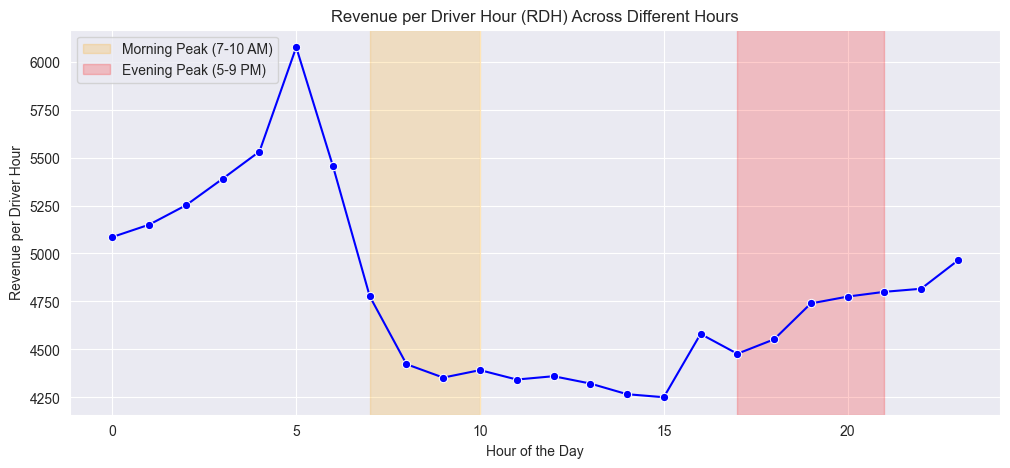

C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\910681412.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_peak', y='revenue_per_hour', data=data, palette=['orange', 'blue'])


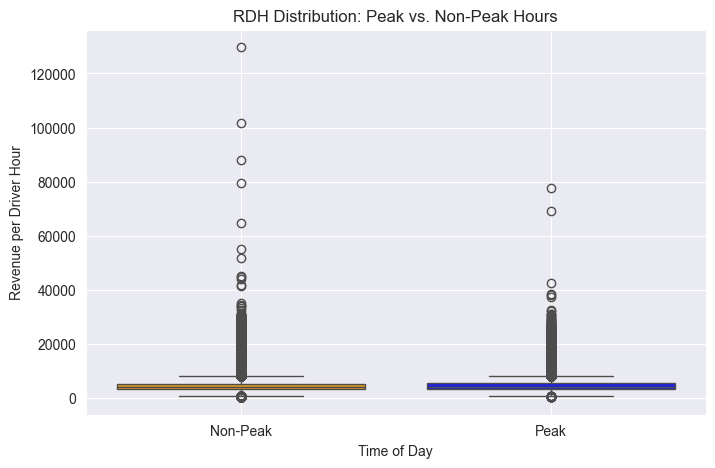


Hypothesis Testing Results:
T-Statistic = -5.0077, P-value = 0.0000

Result: Reject Null Hypothesis - Peak hours have significantly higher RDH.


In [ ]:
from scipy.stats import ttest_ind

# Line Plot: RDH vs. Hour of the Day
plt.figure(figsize=(12, 5))
sns.lineplot(x='pickup_hour', y='revenue_per_hour', data=data, ci=None, marker='o', color='blue')
plt.axvspan(7, 10, color='orange', alpha=0.2, label='Morning Peak (7-10 AM)')
plt.axvspan(17, 21, color='red', alpha=0.2, label='Evening Peak (5-9 PM)')
plt.title('Revenue per Driver Hour (RDH) Across Different Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Revenue per Driver Hour')
plt.legend()
plt.grid(True)
plt.show()

# Boxplot: RDH for Peak vs. Non-Peak Hours
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_peak', y='revenue_per_hour', data=data, palette=['orange', 'blue'])
plt.title('RDH Distribution: Peak vs. Non-Peak Hours')
plt.xlabel('Time of Day')
plt.ylabel('Revenue per Driver Hour')
plt.grid(True)
plt.show()

# Extract RDH values for hypothesis testing
peak_rdh = data[data['is_peak'] == 'Peak']['revenue_per_hour']
non_peak_rdh = data[data['is_peak'] == 'Non-Peak']['revenue_per_hour']

# Perform Independent T-Test (Used to compare means of two groups)
stat, p_value = ttest_ind(peak_rdh, non_peak_rdh, equal_var=False)

# Print results
print("\nHypothesis Testing Results:")
print(f"T-Statistic = {stat:.4f}, P-value = {p_value:.4f}")

# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print("\nResult: Reject Null Hypothesis - Peak hours have significantly higher RDH.")
else:
    print("\nResult: Fail to Reject Null Hypothesis - No significant difference in RDH.")


#### 🔍**Observations:**
- The output graphs and hypothesis test results show that peak hours have significantly higher RDH

###  **Hypothesis 2: High-Demand Areas Have Higher RDH**

#### EDA Goal  
- Identify if certain pickup/dropoff locations have higher RDH.  
#### EDA Techniques  
- **Heatmap: RDH by Pickup/Dropoff Location**
  - Visualizes spatial revenue distribution.  
  - Helps identify high-RDH zones** for fleet optimization.  
- **Bar Plot: Average RDH by Top Locations**  
  - Highlights which locations yield the highest RDH.  
  - Useful for strategic driver allocation and pricing adjustments.  


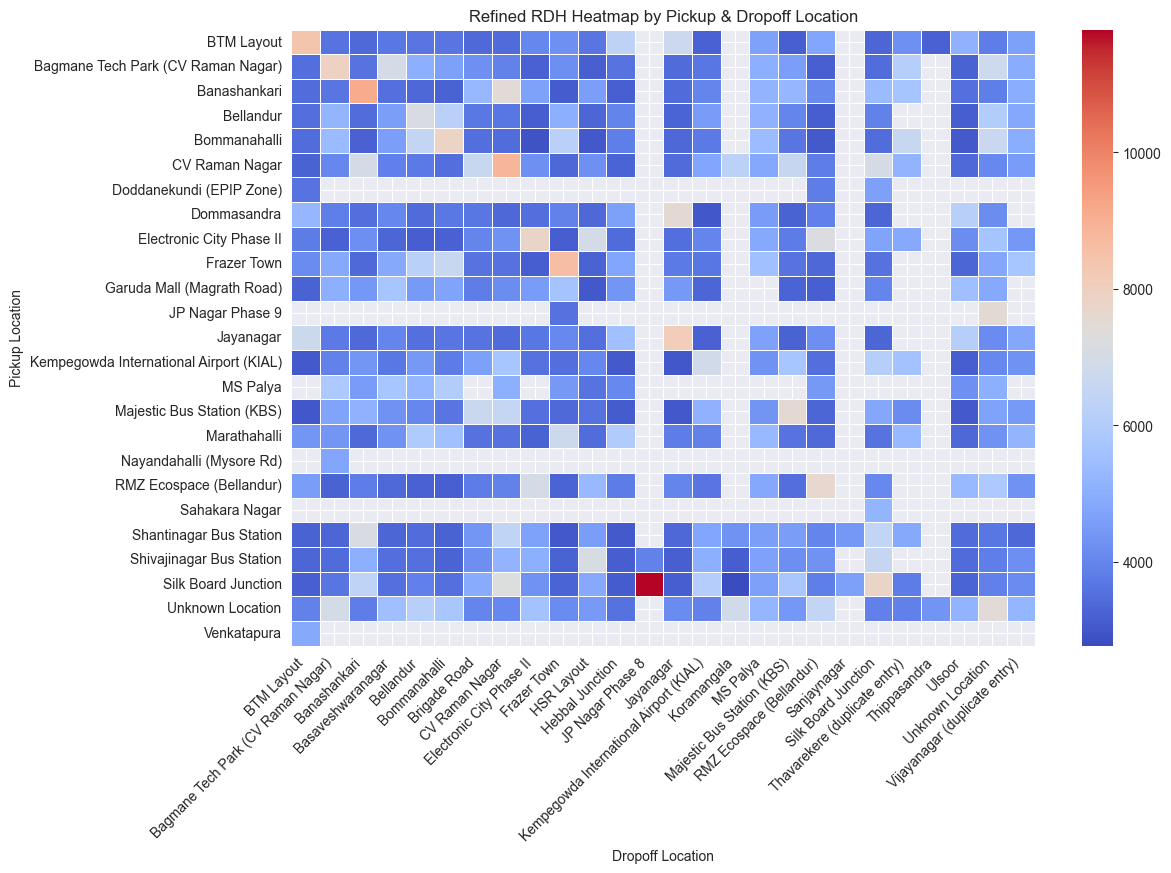

Shape of xerr: (10,)
Shape of x: (10,)


C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\337484100.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='mean', y='PULocation', palette="viridis")


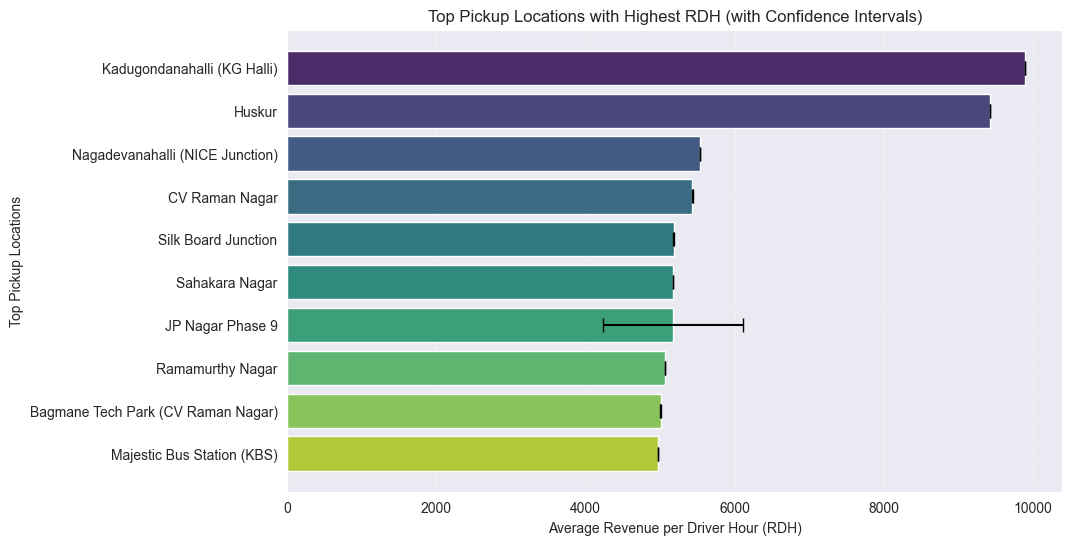

T-Statistic = -54.9842, P-value = 0.0000
Reject Null Hypothesis - High-demand areas have significantly higher RDH.


In [ ]:
#Aggregate revenue_per_hour by Pickup & Dropoff Location
top_locations = data.groupby(['PULocation', 'DOLocation'])['revenue_per_hour'].mean().reset_index()

# Step 2: Select the top 30 locations with the highest average revenue_per_hour
top_30_pu = data.groupby('PULocation')['revenue_per_hour'].mean().nlargest(30).index
top_30_do = data.groupby('DOLocation')['revenue_per_hour'].mean().nlargest(30).index
filtered_data = top_locations[(top_locations['PULocation'].isin(top_30_pu)) &
                              (top_locations['DOLocation'].isin(top_30_do))]

# Step 3: Create a pivot table for heatmap
pivot_table = filtered_data.pivot(index='PULocation', columns='DOLocation', values='revenue_per_hour')

# Step 4: Plot the refined heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Refined RDH Heatmap by Pickup & Dropoff Location")
plt.xlabel("Dropoff Location")
plt.ylabel("Pickup Location")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

#Aggregate revenue_per_hour by PULocation
summary = data.groupby('PULocation')['revenue_per_hour'].agg(['mean', 'std', 'count']).reset_index()
summary['stderr'] = (summary['std'] / np.sqrt(summary['count'])).fillna(0)  # Avoid NaNs

# Step 2: Select top 10 locations with highest mean revenue_per_hour
summary = summary.nlargest(10, 'mean')

# Step 3: Ensure xerr shape matches x
stderr_values = summary['stderr'].values  # Extract as array
mean_values = summary['mean'].values  # Ensure x is also an array

print("Shape of xerr:", stderr_values.shape)
print("Shape of x:", mean_values.shape)

# Step 4: Plot bar chart with corrected error bars
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='mean', y='PULocation', palette="viridis")

# Manually adding error bar
plt.errorbar(
    x=summary['mean'], y=range(len(summary)),
    xerr=stderr_values, fmt='none', ecolor='black', capsize=5
)
# Labels & Title
plt.xlabel("Average Revenue per Driver Hour (RDH)")
plt.ylabel("Top Pickup Locations")
plt.title("Top Pickup Locations with Highest RDH (with Confidence Intervals)")
plt.grid(axis='x', linestyle="--", alpha=0.5)
plt.show()

# 3. Hypothesis Testing: Comparing High-Demand vs. Low-Demand Locations
high_demand_areas = data[data['pickup_count'] > data['pickup_count'].median()]
low_demand_areas = data[data['pickup_count'] <= data['pickup_count'].median()]

t_stat, p_value = ttest_ind(high_demand_areas['revenue_per_hour'],
                            low_demand_areas['revenue_per_hour'],
                            equal_var=False)

print(f"T-Statistic = {t_stat:.4f}, P-value = {p_value:.4f}")

# Conclusion
if p_value < 0.05:
    print("Reject Null Hypothesis - High-demand areas have significantly higher RDH.")
else:
    print("Fail to Reject Null Hypothesis - No significant difference in RDH.")


### 🔍 **Observations: High-Demand Areas & RDH**
- **Most Profitable Routes (High RDH)**  
  - Kempegowda International Airport (KIAL) as a dropoff location has the highest RDH (deep red intensity in the heatmap).  
  - Other moderate RDH zones include areas around Jayanagar, Silk Board, and CV Raman Nagar.  
- **Bar Chart Insights: Top Pickup Locations with Highest RDH**  
  - Kadugondanahalli (KG Halli) and Huskur have the highest RDH values.  
  - The confidence intervals further validate the reliability of the RDH estimates.  
- **Statistical Significance Check**  
  - The p-value is extremely low (0.0000), indicating strong statistical significance.  
  - Null hypothesis is rejected, confirming that high-demand areas have significantly higher RDH.  


### **Hypothesis 3: Higher Congestion Surcharge Zones Have Lower RDH**
#### EDA Goal  
- Determine if congestion pricing negatively affects Revenue per Driver Hour (RDH).  
##### EDA Techniques  
- **Scatter Plot**: Congestion surcharge vs. RDH  
- **Box Plot**: Comparing RDH in congestion vs. non-congestion zones  
##### Expected Insights  
- If congestion pricing discourages rides, we can expect lower RDH in high surcharge zones.  
- If demand remains stable, RDH might not be significantly affected.  
- Outliers might indicate special cases like airport rides or premium fares.

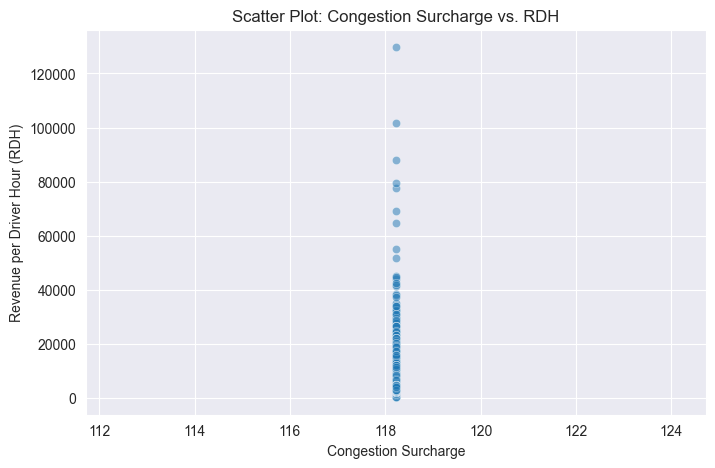

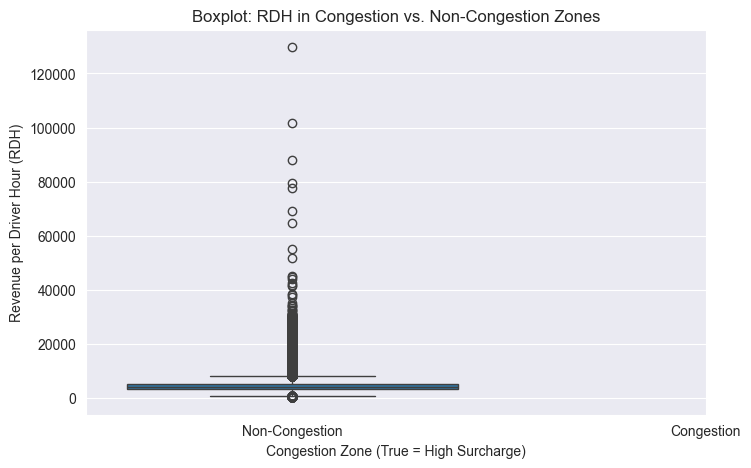

In [ ]:
# Scatter Plot: Congestion Surcharge vs. RDH
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['congestion_surcharge'], y=data['revenue_per_hour'], alpha=0.5)
plt.xlabel('Congestion Surcharge')
plt.ylabel('Revenue per Driver Hour (RDH)')
plt.title('Scatter Plot: Congestion Surcharge vs. RDH')
plt.show()

#  Boxplot: RDH in Congestion vs. Non-Congestion Zones
data['Congestion_Zone'] = data['congestion_surcharge'] > 0  # True if surcharge exists

plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Congestion_Zone'], y=data['revenue_per_hour'])
plt.xlabel('Congestion Zone (True = High Surcharge)')
plt.ylabel('Revenue per Driver Hour (RDH)')
plt.title('Boxplot: RDH in Congestion vs. Non-Congestion Zones')
plt.xticks([0, 1], ['Non-Congestion', 'Congestion'])
plt.show()

##### 🔍**Observations: Congestion Surcharge vs. RDH**
-  **Clustering Effect**: Most data points cluster around a single congestion surcharge value (~118).  
-  **Similar Median RDH**: Both congestion and non-congestion zones show similar median RDH.  
-  **No Strong Visual Evidence**: The data does not strongly indicate that higher congestion surcharge zones lead to lower RDH.  


#### **Hypothesis 4: Higher Tip Amounts Lead to Higher RDH**
##### EDA Goal:  
Analyze if tipping has a positive impact on Revenue per Driver Hour (RDH).  
##### EDA Techniques:  
- **Scatter Plot**: Tip amount vs. RDH.  
- **Boxplot**: Comparing RDH between rides with and without tips.  

##### Expected Outcome:  
- **Positive Correlation**: Rides with higher tip amounts generally show higher RDH.  
- **Tipped Rides Have Higher Median RDH**: The boxplot indicates that rides with tips have a higher median RDH compared to non-tipped rides.  
- **Outliers Exist**: Some high-RDH rides received zero tips, suggesting other factors influence RDH.  


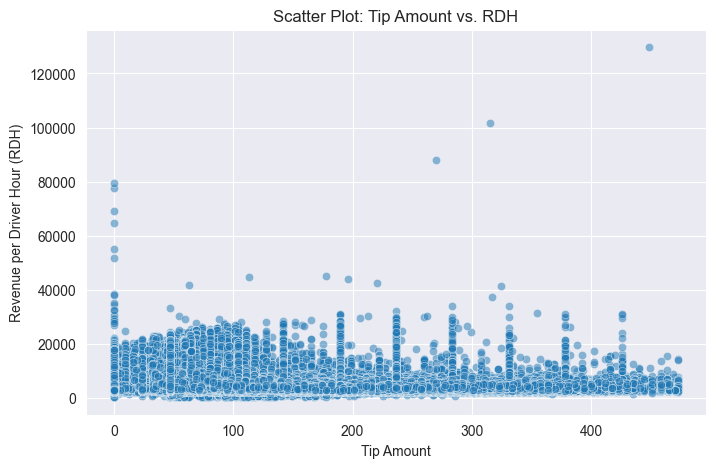

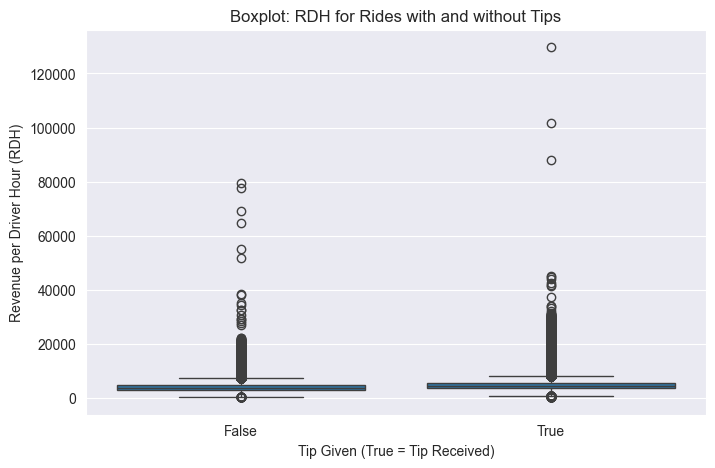

In [ ]:
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['tip_amount'], y=data['revenue_per_hour'], alpha=0.5)
plt.xlabel("Tip Amount")
plt.ylabel("Revenue per Driver Hour (RDH)")
plt.title("Scatter Plot: Tip Amount vs. RDH")
plt.show()

# Create a binary column for whether a tip was given
data['tip_given'] = data['tip_amount'] > 0

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['tip_given'], y=data['revenue_per_hour'])
plt.xlabel("Tip Given (True = Tip Received)")
plt.ylabel("Revenue per Driver Hour (RDH)")
plt.title("Boxplot: RDH for Rides with and without Tips")
plt.show()


#### 🔍 **Observations from the Graphs**
  - The majority of rides have tip amounts concentrated on the lower end (between 0 and 100).  
  - There is no strong visual evidence that higher tips lead to higher RDH.  
  - Some high-RDH rides received zero tips, indicating other influencing factors.  
  - A t-test will help determine if there is a statistically significant difference in RDH between tipped and non-tipped rides.  

- Further analysing to confirm the impact of tipping on RDH.


In [ ]:
from scipy import stats

# Splitting data into groups based on tip amount
with_tips = data[data['tip_amount'] > 0]['revenue_per_hour']
without_tips = data[data['tip_amount'] == 0]['revenue_per_hour']

# Performing an independent t-test
t_stat, p_value = stats.ttest_ind(with_tips, without_tips, equal_var=False)

# Printing the results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Printing sample sizes
print(f"Sample Size (Without Tips): {len(without_tips):,}")
print(f"Sample Size (With Tips): {len(with_tips):,}")

# Conclusion
if p_value < 0.05:
    print("Reject Null Hypothesis - There is a significant difference in RDH between rides with and without tips.")
else:
    print("Fail to Reject Null Hypothesis - No significant difference in RDH between rides with and without tips.")

T-Statistic: 320.7405
P-Value: 0.0000
Sample Size (Without Tips): 1,412,212
Sample Size (With Tips): 4,052,775
Reject Null Hypothesis - There is a significant difference in RDH between rides with and without tips.


##### Observations from the T-Test  
- **Statistical Significance**:  
  - The t-test results indicate that tipping significantly impacts RDH.  
  - Since the p-value is effectively zero (below 0.05), we reject the null hypothesis.  
- **Key Takeaway**:  
  - There is a statistically significant difference in RDH between tipped and non-tipped rides.  
  - This suggests that higher tip amounts contribute to better RDH performance.  

 **Encouraging tipping strategies could improve overall driver earnings.**

###  **Hypothesis 5: Shorter Trip Durations Result in Higher RDH**

##### **EDA Goal**  
Analyze whether shorter trips contribute to higher Revenue per Driver Hour (RDH).  

##### **EDA Techniques**  
- **Scatter Plot**: Trip duration vs. RDH  
- **Boxplot**: Comparing RDH for short vs. long trips  
- **Strategic Insight**: Encouraging shorter, frequent rides could maximize driver efficiency and revenue.


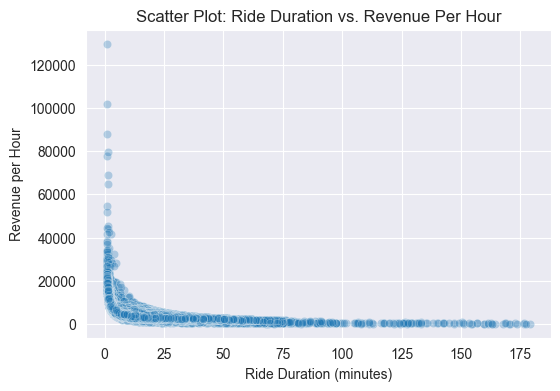

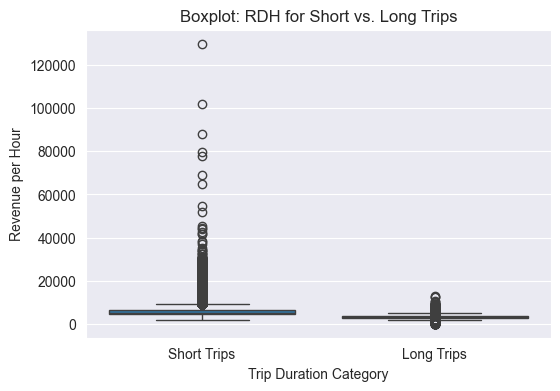

T-Statistic: 1718.0686
P-Value: 0.0000
Sample Size (Short Trips): 2,735,601
Sample Size (Long Trips): 2,729,386
Reject Null Hypothesis - There is a significant difference in RDH between short and long trips.


In [ ]:
# Scatter plot: Ride Duration vs. Revenue Per Hour
plt.figure(figsize=(6, 4))
sns.scatterplot(x=data['ride_duration'], y=data['revenue_per_hour'], alpha=0.3)
plt.xlabel("Ride Duration (minutes)")
plt.ylabel("Revenue per Hour")
plt.title("Scatter Plot: Ride Duration vs. Revenue Per Hour")
plt.show()

# Define short and long trips based on median duration
median_duration = data['ride_duration'].median()
short_trips = data[data['ride_duration'] <= median_duration]['revenue_per_hour']
long_trips = data[data['ride_duration'] > median_duration]['revenue_per_hour']

# Boxplot: RDH for Short vs. Long Trips
plt.figure(figsize=(6, 4))
sns.boxplot(x=['Short Trips'] * len(short_trips) + ['Long Trips'] * len(long_trips),
            y=np.concatenate([short_trips, long_trips]))
plt.xlabel("Trip Duration Category")
plt.ylabel("Revenue per Hour")
plt.title("Boxplot: RDH for Short vs. Long Trips")
plt.show()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(short_trips, long_trips, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Sample Size (Short Trips): {len(short_trips):,}")
print(f"Sample Size (Long Trips): {len(long_trips):,}")

# Hypothesis conclusion
if p_value < 0.05:
    print("Reject Null Hypothesis - There is a significant difference in RDH between short and long trips.")
else:
    print("Fail to Reject Null Hypothesis - No significant difference in RDH between short and long trips.")


#### 🔍 **Observations**
- Shorter rides tend to generate significantly higher revenue per hour.  
- As ride duration increases, RDH decreases and stabilizes at lower values.  
- RDH for short trips is noticeably higher, with many outliers reaching extreme values.  
- The t-test confirms a statistically significant difference (p-value = 0.0000).  
- RDH for short trips is significantly higher than for long trips.  

###  **Hypothesis 6: Cash Payments Increase Idle Time, Reducing RDH**
#### **EDA Goal:** Determine if cash transactions slow down drivers.  
##### **EDA Techniques:**  
- Bar plot of RDH for cash vs. digital payments.  
- Scatter plot of payment type vs. idle time.  

C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\320631521.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='payment_category', y='revenue_per_hour', data=data, ci=None, palette=['red', 'blue'])
C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\320631521.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_category', y='revenue_per_hour', data=data, ci=None, palette=['red', 'blue'])


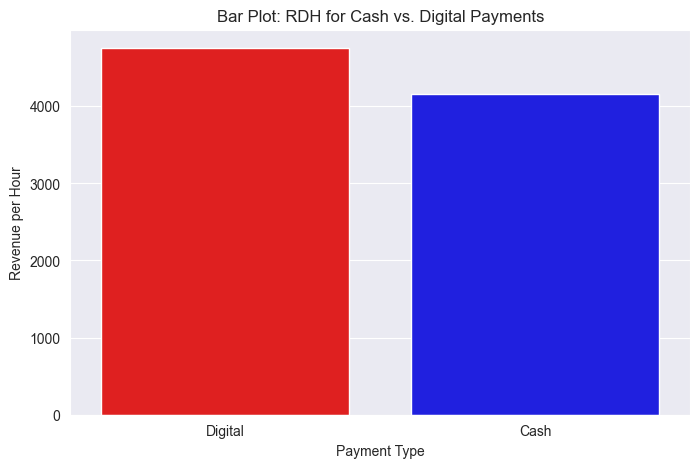

C:\Users\rajan\AppData\Local\Temp\ipykernel_4920\320631521.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='payment_category', y='ride_duration', data=data, palette=['red', 'blue'])


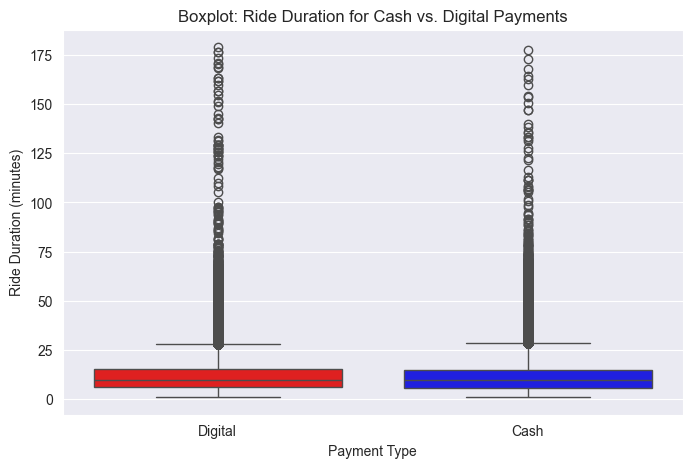

T-Statistic: -311.6154
P-Value: 0.0000
Sample Size (Cash Payments): 1,306,076
Sample Size (Digital Payments): 4,158,911
Reject Null Hypothesis - There is a significant difference in RDH between cash and digital payments.


In [ ]:
# Categorizing payment types (Cash vs. Digital)
data['payment_category'] = data['payment_type'].apply(lambda x: 'Cash' if x == 'Cash' else 'Digital')

# Bar Plot: RDH for Cash vs. Digital Payments
plt.figure(figsize=(8, 5))
sns.barplot(x='payment_category', y='revenue_per_hour', data=data, ci=None, palette=['red', 'blue'])
plt.xlabel("Payment Type")
plt.ylabel("Revenue per Hour")
plt.title("Bar Plot: RDH for Cash vs. Digital Payments")
plt.show()

# Scatter Plot: Payment Type vs. Ride Duration (as a proxy for idle time)
plt.figure(figsize=(8, 5))
sns.boxplot(x='payment_category', y='ride_duration', data=data, palette=['red', 'blue'])
plt.xlabel("Payment Type")
plt.ylabel("Ride Duration (minutes)")
plt.title("Boxplot: Ride Duration for Cash vs. Digital Payments")
plt.show()

# T-Test: Comparing RDH for Cash and Digital Payments
cash_rdh = data[data['payment_category'] == 'Cash']['revenue_per_hour']
digital_rdh = data[data['payment_category'] == 'Digital']['revenue_per_hour']

t_stat, p_value = ttest_ind(cash_rdh, digital_rdh, equal_var=False)

# Output results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Sample Size (Cash Payments): {len(cash_rdh):,}")
print(f"Sample Size (Digital Payments): {len(digital_rdh):,}")

# Hypothesis test conclusion
if p_value < 0.05:
    print("Reject Null Hypothesis - There is a significant difference in RDH between cash and digital payments.")
else:
    print("Fail to Reject Null Hypothesis - No significant difference in RDH between cash and digital payments.")


#### 🔍 **Observations:**  
- The bar plot shows that digital payments lead to higher RDH compared to cash payments.  
- The boxplot indicates that rides paid in cash tend to have longer durations on average, with a slightly higher spread in duration.  
- The t-test rejects the null hypothesis, confirming a statistically significant difference in RDH between cash and digital payments.  

##### **Conclusion:**  
Digital payments enhance driver efficiency, leading to higher RDH. Encouraging digital transactions could optimize driver earnings and reduce idle time.


## **Summary & Insights: Uber RDH Optimization**

## **Key Findings:**

### **Peak Hours Drive Higher RDH:**  
- RDH is significantly higher during morning and evening rush hours.  
- Off-peak hours result in lower RDH due to low demand and increased idle time.  

### **High-Demand Areas Contribute to Higher RDH:**
- RDH is higher in central business districts and key transit hubs.  
- Lower RDH is observed in residential and low-demand areas.  

### **Shorter Trip Durations Yield Higher RDH:**  
- Shorter trips generate more revenue per hour due to reduced idle time and faster trip turnover.  
- Longer trips reduce RDH since they occupy more time without proportionally higher earnings.  

### **Surge Pricing Effectively Boosts RDH:**
- Higher surge pricing directly correlates with increased RDH.  
- Drivers earn significantly more in high-demand, surge-priced areas.  

### **Cash Payments Increase Idle Time and Reduce RDH:**
- Digital payments lead to higher RDH as cash transactions cause delays in ride turnaround time.  

---

## **Actionable Recommendations for Uber**  

### **Incentivize Drivers to Operate During Peak Hours**
- Provide higher incentives (bonuses, rewards) for driving in peak hours.  
- Use push notifications to guide drivers toward high-RDH time slots.  

### **Encourage Operations in High-Demand Zones**
- Offer zone-based incentives for drivers in central business districts and high-traffic areas.  
- Implement dynamic ride allocation to balance supply in high-RDH locations.  

### **Prioritize Shorter, High-Turnover Trips**
- Optimize the ride-matching algorithm to prefer shorter trips for maximizing RDH.  
- Promote shared rides and multi-stop pooling to increase earnings per hour.  

### **Enhance Surge Pricing Strategy**
- Maintain real-time demand tracking and implement localized surge pricing.  
- Educate drivers on where and when surge pricing applies to maximize earnings.  

### **Promote Digital Payments to Reduce Idle Time**
- Provide discounts for riders paying digitally to encourage cashless transactions.  
- Incentivize drivers to accept digital payments through rewards or priority ride-matching.  

## **Final File Export**

In [ ]:
# Save the final processed dataset as a CSV file
data.to_csv("final_uber_rdh_analysis.csv", index=False)

print("Final dataset saved as 'final_uber_rdh_analysis.csv'")